In [68]:
# import necessary libraries
#pandas, numpy, matplotlib, sklearn, tensorflow.keras
# These libraries are essential for data manipulation, visualization, model building, and evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder




In [69]:
df=pd.read_csv('adult.csv')

In [70]:
print(df.head(10))

   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

In [71]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
df.replace('?', np.nan, inplace=True)
missing_values_count = df.isnull().sum()
print(missing_values_count)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [73]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


C:\Users\darsh\AppData\Local\Temp\ipykernel_22520\2884558947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [74]:
y = df['income']
X = df.drop('income', axis=1)
display(X.head())
display(y.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [75]:
X_categorical = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=X_categorical, drop_first=True)
display(X.head())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [76]:
numerical_cols = X.select_dtypes(include=np.number).columns



scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24420, 97)
Shape of X_test: (8141, 97)
Shape of y_train: (24420,)
Shape of y_test: (8141,)


In [78]:


def create_model(input_shape, num_layers, units_per_layer, activation='relu'):

    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activation, input_shape=(input_shape,)))
    for units in units_per_layer[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


input_shape = X_train.shape[1]
model1 = create_model(input_shape=input_shape, num_layers=1, units_per_layer=[64])
model2 = create_model(input_shape=input_shape, num_layers=2, units_per_layer=[128, 64])
model3 = create_model(input_shape=input_shape, num_layers=3, units_per_layer=[256, 128, 64])

models = [model1, model2, model3]

C:\Users\darsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


def train_and_evaluate_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs=50, batch_size=32, validation_split=0.2):

    print(f"Training model...")
    history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    print("Model training complete.")

    print("Evaluating model...")
    loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print("Model evaluation complete.")

    print("Making predictions...")
    y_pred = model.predict(X_test)
    print("Prediction complete.")

    mse = mean_squared_error(y_test_encoded, y_pred)
    r2 = r2_score(y_test_encoded, y_pred)

    return accuracy, loss, mse, r2, history

In [80]:

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

print("Encoded y_train:", y_train_encoded[:5])
print("Encoded y_test:", y_test_encoded[:5])

Encoded y_train: [1 0 0 1 0]
Encoded y_test: [0 0 0 0 0]


In [81]:
accuracy1, loss1, mse1, r2_1, history1 = train_and_evaluate_model(model1, X_train, y_train_encoded, X_test, y_test_encoded)

print(f"Model 1 Accuracy: {accuracy1}")
print(f"Model 1 Loss: {loss1}")
print(f"Model 1 Mean Squared Error (MSE): {mse1}")
print(f"Model 1 R-squared (R²) Score: {r2_1}")

Training model...
Model training complete.
Evaluating model...
Model evaluation complete.
Making predictions...
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction complete.
Model 1 Accuracy: 0.8529664874076843
Model 1 Loss: 0.31895002722740173
Model 1 Mean Squared Error (MSE): 0.1012539427141056
Model 1 R-squared (R²) Score: 0.44295579195022583


In [82]:
accuracy2, loss2, mse2, r2_2, history2 = train_and_evaluate_model(model2, X_train, y_train_encoded, X_test, y_test_encoded)

print(f"Model 2 Accuracy: {accuracy2}")
print(f"Model 2 Loss: {loss2}")
print(f"Model 2 Mean Squared Error (MSE): {mse2}")
print(f"Model 2 R-squared (R²) Score: {r2_2}")

Training model...
Model training complete.
Evaluating model...
Model evaluation complete.
Making predictions...
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction complete.
Model 2 Accuracy: 0.844245195388794
Model 2 Loss: 0.3854459226131439
Model 2 Mean Squared Error (MSE): 0.11047130249913538
Model 2 R-squared (R²) Score: 0.39224690198898315


In [ ]:
accuracy3, loss3, mse3, r2_3, history3 = train_and_evaluate_model(model3, X_train, y_train_encoded, X_test, y_test_encoded)

print(f"Model 3 Accuracy: {accuracy3}")
print(f"Model 3 Loss: {loss3}")
print(f"Model 3 Mean Squared Error (MSE): {mse3}")
print(f"Model 3 R-squared (R²) Score: {r2_3}")

Training model...


In [ ]:
summary_data = {
    'Metric': ['Accuracy', 'Loss', 'MSE', 'R² Score'],
    'Model 1': [accuracy1, loss1, mse1, r2_1],
    'Model 2': [accuracy2, loss2, mse2, r2_2],
    'Model 3': [accuracy3, loss3, mse3, r2_3]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Metric,Model 1,Model 2,Model 3
0,Accuracy,0.852107,0.845228,0.834050
1,Loss,0.320312,0.380808,0.564380
2,MSE,0.101658,0.110343,0.120083
3,R² Score,0.440734,0.392952,0.339370


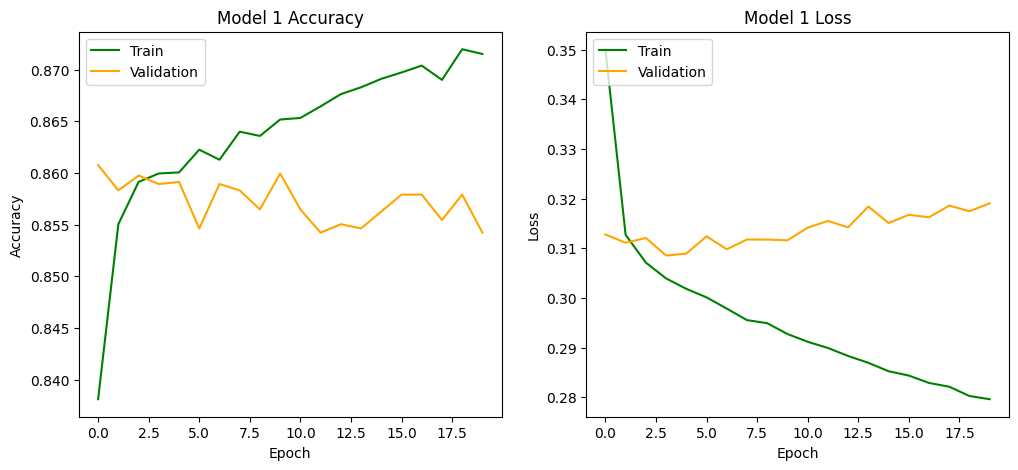

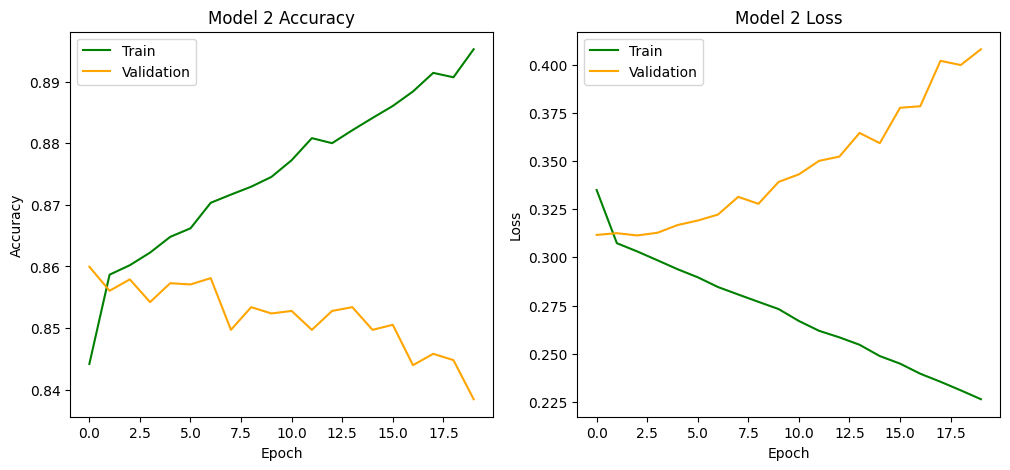

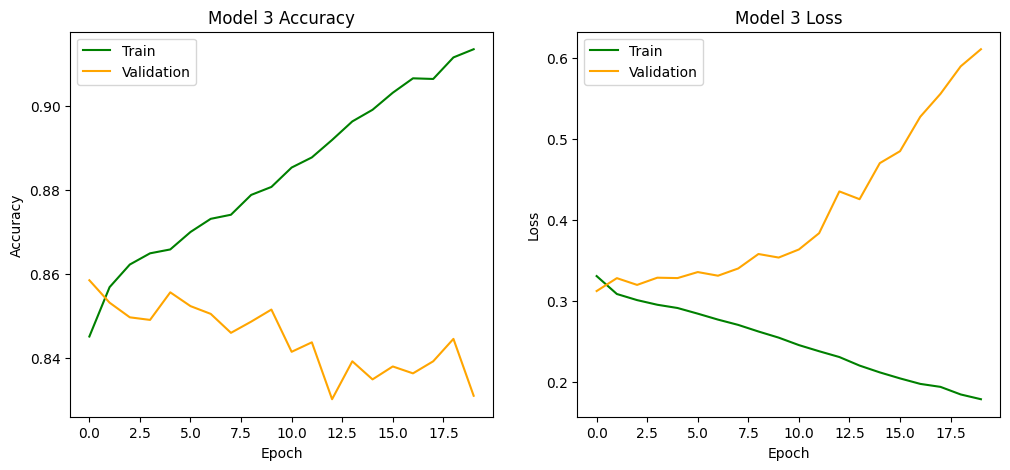

In [ ]:


def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],color='green')
    plt.plot(history.history['val_accuracy'],color='orange')
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'],color='green')
    plt.plot(history.history['val_loss'],color='orange')
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history1, "Model 1")
plot_history(history2, "Model 2")
plot_history(history3, "Model 3")